In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from warnings import filterwarnings
filterwarnings('ignore')
#loading the dataset 
iris = load_iris()

Load your dataset and split the data into training and testing data

In [2]:
#create a pandas dataframe from data
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

#adding the target variable to dataframe
iris_df['target'] = iris.target

#splitting the data into features and data
X, y = iris_df.drop(columns='target',axis=1),iris_df['target']

#splitting into training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)


Apply your hyperparameters and train your model

In [5]:
#converting training and test data to Dmatrix format
dtrain = xgb.DMatrix(X_train,label=y_train)
dtest = xgb.DMatrix(X_test,label=y_test)

In [6]:
#setting the hyperparameters
params = {
    'objective':'multi:softmax',
    'num_class' : 3,
    'max_depth':3,
    'eta' : 0.1
}

In [7]:
#training the model 
num_rounds = 100
xgb_model = xgb.train(params,dtrain,num_rounds)


Apply your hyperparameters and train your model

In [8]:
y_pred = xgb_model.predict(dtest)

In [9]:
#calculating accuracy 
accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy Score : {accuracy}')


Accuracy Score : 1.0


In [10]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,cohen_kappa_score,log_loss,auc
import matplotlib.pyplot as plt

In [11]:
#calculating the various metrics 

cm = confusion_matrix(y_test,y_pred)
print(f'Confusion Matrix : \n{cm}')

cr = classification_report(y_test,y_pred)
print(f'\nClassification Report : \n{cr}')

kappa = cohen_kappa_score(y_test,y_pred)
print(f'\nCohen Kappa Score : \n{kappa}')

y_pred_prob = xgb_model.predict(dtest,output_margin=True)
logloss = log_loss(y_test,y_pred_prob)
print(f'\nLog Loss  : \n{logloss}')

Confusion Matrix : 
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Cohen Kappa Score : 
1.0

Log Loss  : 
0.008915826452954474


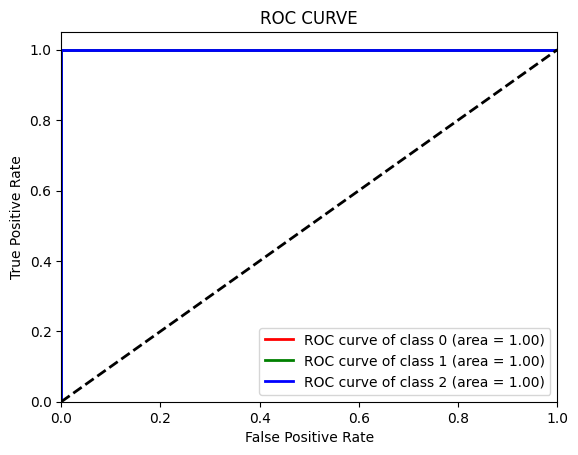

In [12]:
n_classes = len(set(y_train))
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i] , _ = roc_curve((y_test==i).astype(int),y_pred_prob[:,i])
    roc_auc[i] = auc(fpr[i],tpr[i])


#plotting the ROC curves
plt.figure()
colors = ['red','green','blue']
for i, color in zip(range(n_classes),colors):
    plt.plot(
        fpr[i],tpr[i],color=color,lw=2,
        label = 'ROC curve of class {0} (area = {1:0.2f})'''.format(i,roc_auc[i])
    )

#plotting the diagonal line
plt.plot([0,1],[0,1],'k--',lw=2)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc='lower right')
plt.show()

## MNIST DATASET

In [13]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [14]:
from sklearn.datasets import fetch_openml
#load the dataset 
mnist = fetch_openml('mnist_784')

In [15]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [16]:
#loading the dataframe
mnist_df = pd.DataFrame(
    data=mnist.data.astype('float32'),
    columns=mnist.feature_names
)

In [17]:
mnist_df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
mnist_df['target'] = mnist.target.astype('int')

In [19]:
mnist_df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [20]:
mnist_df['target'].nunique()
#10 classes

10

In [21]:
X,y = mnist_df.drop(columns='target' , axis=1), mnist_df['target']

#splitting into training and test
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [22]:
#Comverting into Dmatrix
dtrain = xgb.DMatrix(X_train,label=y_train)
dtest = xgb.DMatrix(X_test,label=y_test)

In [23]:
# Set the XGBoost parameters
params = {
    'objective': 'multi:softmax',
    'num_class': 10,
    'max_depth': 6,
    'eta': 0.3,
    'subsample': 0.8,
    'colsample_bytree': 0.8
}

In [24]:
# Train the XGBoost model
num_rounds = 100
xgb_model = xgb.train(params, dtrain, num_rounds)

In [25]:
#running prediction 
y_pred = xgb_model.predict(dtest)

In [26]:
#calculating the various metrics 

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

cm = confusion_matrix(y_test,y_pred)
print(f'\nConfusion Matrix : \n{cm}')

cr = classification_report(y_test,y_pred)
print(f'\nClassification Report : \n{cr}')

kappa = cohen_kappa_score(y_test,y_pred)
print(f'\nCohen Kappa Score : \n{kappa}')

y_pred_prob = xgb_model.predict(dtest,output_margin=True)
logloss = log_loss(y_test,y_pred_prob)
print(f'\nLog Loss  : \n{logloss}')

Accuracy: 0.9747142857142858

Confusion Matrix : 
[[2027    1    5    1    2    3    5    1   10    3]
 [   0 2336    9    7    2    0    1    6    2    1]
 [   1    5 2085    3    8    0    7   14    7    3]
 [   3    1   26 2086    2   16    2   14   11   15]
 [   2    4    3    1 1891    0    2    5    1   27]
 [   4    3    4   13    4 1860   12    1   11    3]
 [   4    2    0    1    8   12 2055    0    6    0]
 [   2    3   22    4    5    2    0 2190    3   17]
 [   6    7    6   10    2    4    9    6 1932   10]
 [   9    7    4    8   23    3    2   18    9 2007]]

Classification Report : 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2058
           1       0.99      0.99      0.99      2364
           2       0.96      0.98      0.97      2133
           3       0.98      0.96      0.97      2176
           4       0.97      0.98      0.97      1936
           5       0.98      0.97      0.98      1915
           6  

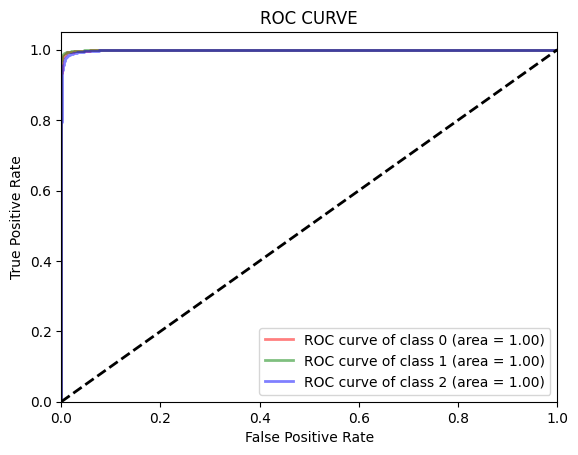

In [28]:
n_classes = len(set(y_train))
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i] , _ = roc_curve((y_test==i).astype(int),y_pred_prob[:,i])
    roc_auc[i] = auc(fpr[i],tpr[i])


#plotting the ROC curves
plt.figure()
colors = ['red','green','blue']
for i, color in zip(range(n_classes),colors):
    plt.plot(
        fpr[i],tpr[i],color=color,lw=2,alpha=0.5,
        label = 'ROC curve of class {0} (area = {1:0.2f})'''.format(i,roc_auc[i])
    )

#plotting the diagonal line
plt.plot([0,1],[0,1],'k--',lw=2)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc='lower right')
plt.show()